In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import random

In [149]:
def euclidean(point, data):
   
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [150]:
# KMeans implementation
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize the centroids using the k-means method
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters - 1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]

            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

    def inertia(self, X):
        _, classification = self.evaluate(X)
        inertia = 0
        for idx, x in enumerate(X):
            centroid = self.centroids[classification[idx]]
            inertia += np.sum((x - centroid) ** 2)
        return inertia


In [151]:
iris = load_iris()
X_train = iris.data[:, 2:]
X_train = MinMaxScaler().fit_transform(X_train) 

C:\Users\Awerty\AppData\Local\Temp\ipykernel_41228\688890301.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x for x, _ in kmeans.centroids],


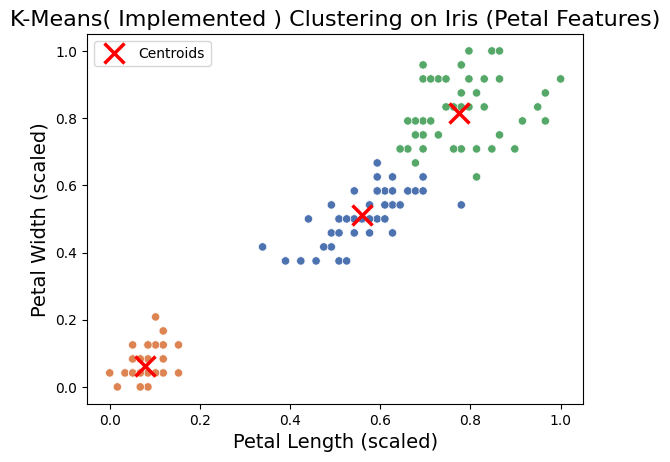

In [152]:
# at first lets assume k=3 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_train)


class_centers, classification = kmeans.evaluate(X_train)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                palette="deep",
                legend=None)
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'kx',
         markersize=15,
         markeredgewidth=2.5,
         c="red",
         label='Centroids')
plt.title("K-Means( Implemented ) Clustering on Iris (Petal Features)", fontsize=16)
plt.xlabel("Petal Length (scaled)", fontsize=14)
plt.ylabel("Petal Width (scaled)", fontsize=14)
plt.legend(loc="best")
plt.show()

c:\Users\Awerty\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Awerty\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


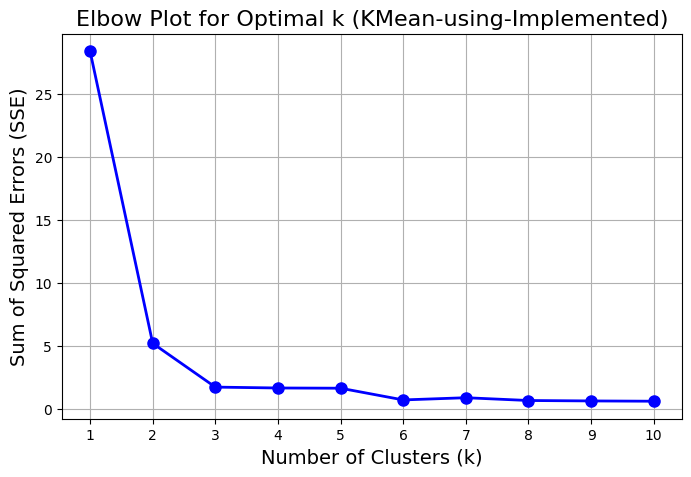

In [153]:
# Elbow graph to determine optimal k
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia(X_train))

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.title("Elbow Plot for Optimal k (KMean-using-Implemented)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Sum of Squared Errors (SSE)", fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [154]:
"From the graph's elbow we can conclude that the optimal value for 'K' is 2"

"From the graph's elbow we can conclude that the optimal value for 'K' is 2"